# 1.Machine Learning

## 波士顿房价的线性规划问题

In [7]:
from sklearn.datasets import load_boston

In [8]:
type(load_boston())

sklearn.utils.Bunch

In [9]:
data = load_boston(True)

In [10]:
load_boston?

In [11]:
import numpy as np

In [12]:
data[0].shape

(506, 13)

In [13]:
x = data[0].T
y = data[1]

In [14]:
print(len(x),len(x[0]),len(y))

13 506 506


### 观察输入与输出的规律

In [15]:
from matplotlib import pyplot as plt

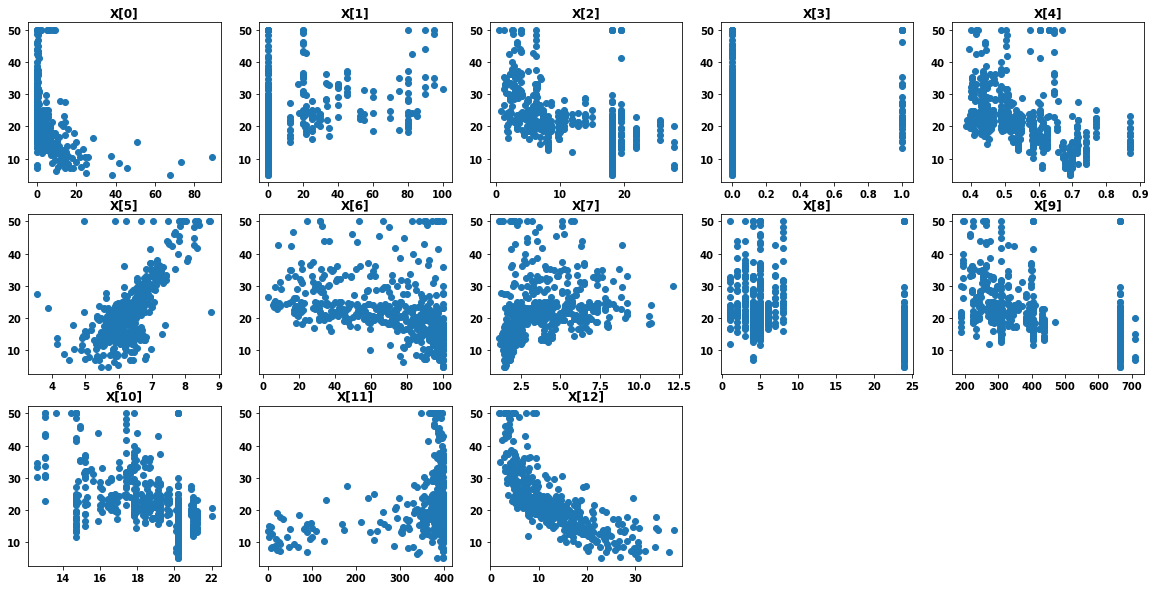

In [16]:
plt.figure(figsize=(20, 10))
for i in range(len(x)):
    plt.subplot(3,5,i+1)
    plt.scatter(x[i],y)
    plt.title('X[{}]'.format(i))

### 选取第6项属性Test

Text(0.5,0,'X')

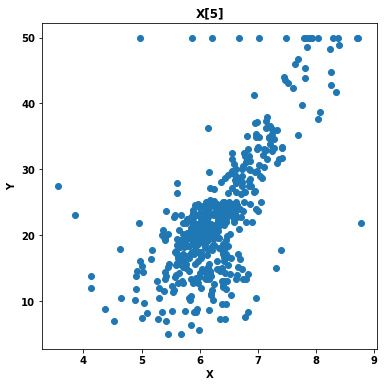

In [17]:
plt.figure(figsize=(6, 6))   
plt.scatter(x[5],y)
plt.title('X[5]')
plt.ylabel('Y')
plt.xlabel('X')

## 三种方法拟合y=kx+b

### 1.1 随机选择k与b，使得loss尽可能小，loss =1/n*sum (y-y_)^2

In [18]:
import random
def rand_k_b(epoch,x,y):
    cost = 0
    k = 0
    b = 0
    for i in range(epoch):
        k0 = random.random()*1000 - 100
        b0 = random.random()*200 - 100
        y0 = k0*x + b0
        cost0 = np.sum((y-y0)**2)/len(x) 
        if i == 0:
            cost = cost0
            print('Epoch = {} Current Loss is {} and k = {},b = {}'.format(i,cost,k0,b0))
        else:
            if cost0 < cost:
                cost = cost0
                k = k0
                b = b0
                print('Epoch = {} Current Loss is {} and k = {},b = {}'.format(i,cost,k,b))   
    return k,b

In [19]:
X = x[5]

In [20]:
rand_k_b(1000,X,y)

Epoch = 0 Current Loss is 26520988.75522267 and k = 831.7355797905742,b = -87.24634796796478
Epoch = 1 Current Loss is 9474992.271862576 and k = 479.8133419080558,b = 67.43800013121313
Epoch = 2 Current Loss is 6965916.523035954 and k = 410.4932323323418,b = 66.94564544570656
Epoch = 5 Current Loss is 6494881.679699204 and k = 421.22083102139084,b = -92.65968804852803
Epoch = 6 Current Loss is 5772.734534326004 and k = 0.01759400473619621,b = -52.99972939716135
Epoch = 80 Current Loss is 1036.907959664168 and k = -2.202140634603353,b = 5.8708513906716036
Epoch = 129 Current Loss is 844.0751645337542 and k = 5.757418498023668,b = 14.544621681711618
Epoch = 151 Current Loss is 71.69409413933008 and k = 5.873044992740191,b = -9.58586284418513
Epoch = 478 Current Loss is 54.441386372712586 and k = 9.012254511296817,b = -37.39785641734903


(9.012254511296817, -37.39785641734903)

### 1.2 有监督方向

In [21]:
def limit_direction(epoch,x,y):
    direction = [[1,1],
                 [1,-1],
                 [-1,1],
                 [-1,-1]]
    next_dir = random.choice(direction)
    learning_rate = 0.2
    k = random.random()*200 - 100
    b = random.random()*200 - 100
    #cost_ = 0
    #cost0 = 0
    for i in range(epoch):
        k += next_dir[0]*learning_rate
        b += next_dir[1]*learning_rate        
        y_hat = k*x + b
        cost = np.sum((y-y_hat)**2)/len(y)
        if i == 0: cost_ = cost
        elif cost < cost_:       #if direction is right
            cost_ = cost       #refresh the loss
            print('\r Epoch = {} Current Loss is {} and k = {},b = {},next = {}'.format(i,cost,k,b,next_dir),end='')
        else:                                        #if direction not right 
            k -= next_dir[0]*learning_rate           #k,b reroll
            b -= next_dir[1]*learning_rate
            next_dir = random.choice([i for i in direction if i!= next_dir])    
            #next_dir = random.choice(direction)      #random choose a direction
            #print('Epoch = {} Current Loss is {} and k = {},b = {},next = {}--Bad desision'.format(i,cost,k,b,next_dir))            
        #print('Epoch = {} Current Loss is {} and k = {},b = {},next = {}'.format(i,cost,k,b,next_dir))
    plt.plot(x,k*x+b)
    plt.scatter(x,y)
    print('\n Bottom Loss is {} Best_k = {},Best_b = {}'.format(cost,k,b))
    return k,b

 Epoch = 227 Current Loss is 66.8316286437167 and k = 2.2405784836805998,b = 8.637842527466251,next = [-1, 1]
 Bottom Loss is 67.00988473446051 Best_k = 2.2405784836805998,Best_b = 8.637842527466251


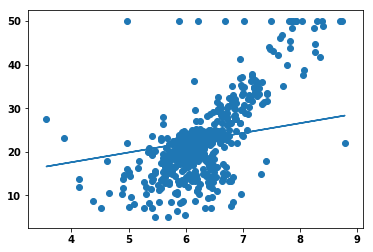

In [22]:
import matplotlib.pyplot as plt 
k , b = limit_direction(3000,X,y)

### 1.3 梯度下降 loss = MSE or RMS
$$ C = \frac{1}{n}\sum{(y-\hat{y})}^2 $$
$$ \Delta{C} \approx -\frac{2}{n}\sum{(y-\hat{y})(\frac{\partial{\hat{y}}}{\partial{k}}\Delta{k}+\frac{\partial{\hat{y}}}{\partial{b}}\Delta{b})} $$
$$ = -\frac{2}{n}\sum{(y-\hat{y})(x\Delta{k}+\Delta{b})}$$
$$ if \rightarrow x\Delta{k}+\Delta{b} = \eta(y-\hat{y}) = -\eta kx+\eta(y-b)$$
$$ \Delta{C} \approx  - \eta C$$
$$ assume: \Delta{b} = \eta(y-b) \rightarrow \Delta{k} = -\eta k $$
Update k and b: 
$$ k\rightarrow\hat{k} = k + \Delta{k} = k - \eta k $$
$$b\rightarrow\hat{b} = b + \Delta{b} = b + \eta(y-b)$$

In [23]:
def gd_k_b(epoch,eta,init,x,y,loss = 'MSE'):
    #eta = 0.1
    k = random.random()*init
    b = random.random()*init
    cost = 0
    for i in range(epoch):        
        k_partial = 0
        b_partial = 0
        y_hat = k*x+b
        if loss == 'MSE': 
            #cost_deta = -2*np.sum((y-y_hat)*(x*k_delta+b_delta))/len(x) 
            k_partial = -2*np.sum((y-y_hat)*x)/len(x)
            b_partial = -2*np.sum((y-y_hat))/len(x)
        elif loss == 'RMS':
            k_partial = np.sum([x[i] if((y-y_hat)[i]<0)  else -x[i] for i in range(len(x))])/len(x)
            b_partial = np.sum([1 if((y-y_hat)[i]<0)  else -1 for i in range(len(x))])/len(x)
        k = k - k_partial*eta               #update k and b
        b = b - b_partial*eta
        y_hat = k*x+b
        if loss == 'MSE': 
            cost = np.sum((y-y_hat)**2)/len(x) 
        elif loss == 'RMS':                                 
            cost = np.sum(abs(y-y_hat))/len(x)
        #print('Epoch = {} Current Loss is {} k_partial = {} b_partial = {} and k = {},b = {}'.format(i,cost,k_partial,b_partial,k,b))
    print(' Epoch = {} eta = {} Loss is {} k = {},b = {}'.format(epoch,eta,cost,k,b))        
    return k,b,cost

#### MSE

 Epoch = 7000 eta = 0.01 Loss is 44.14439484497682 k = 8.057666240767986,b = -28.02679725032244


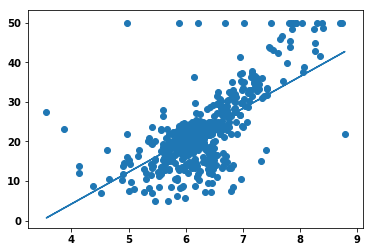

In [24]:
k,b,__= gd_k_b(7000,0.01,1,X,y,loss='MSE')
plt.plot(X,k*X+b)
plt.scatter(X,y)

#### eta（学习速率）与性能

In [25]:
def dif_eta(epoch,x,y,loss = 'MSE'):
    etas = [i*0.0004 for i in range(1,50)]
    costs = []
    for i in range(len(etas)):
        __,__,cost = gd_k_b(epoch,etas[i],1,x,y,loss)
        print(cost)
        costs.append(cost)
    plt.plot(etas,costs)

 Epoch = 7000 eta = 0.0004 Loss is 56.901680027600875 k = 3.9368503124312744,b = -1.8138008340044935
56.901680027600875
 Epoch = 7000 eta = 0.0008 Loss is 55.3798482655611 k = 4.241311676238651,b = -3.7505154985712608
55.3798482655611
 Epoch = 7000 eta = 0.0012000000000000001 Loss is 54.198204404690834 k = 4.491559632945794,b = -5.342372282866625
54.198204404690834
 Epoch = 7000 eta = 0.0016 Loss is 52.865430151161064 k = 4.791211488768124,b = -7.248493099572014
52.865430151161064
 Epoch = 7000 eta = 0.002 Loss is 51.49733178401272 k = 5.1222026168939125,b = -9.353966725737207
51.49733178401272
 Epoch = 7000 eta = 0.0024000000000000002 Loss is 50.72232114993291 k = 5.322544250740647,b = -10.628363500888334
50.72232114993291
 Epoch = 7000 eta = 0.0028 Loss is 49.72687086377572 k = 5.596627788460547,b = -12.371841228835137
49.72687086377572
 Epoch = 7000 eta = 0.0032 Loss is 48.91823483381961 k = 5.836162532204982,b = -13.895550001211896
48.91823483381961
 Epoch = 7000 eta = 0.0036000000

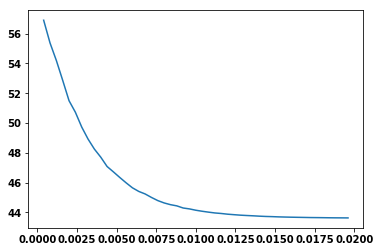

In [26]:
dif_eta(7000,X,y)

#### 初始化区间与性能

In [27]:
def dif_init(epoch,x,y,loss = 'MSE'):
    inits = [i*5 for i in range(1,51)]
    costs = []
    for i in range(len(inits)):
        __,__,cost = gd_k_b(epoch,0.001,inits[i],x,y,loss)
        print(cost)
        costs.append(cost)
    plt.plot(inits,costs)

 Epoch = 1000 eta = 0.001 Loss is 59.61949176949464 k = 3.4336537367924644,b = 1.3870919657007397
59.61949176949464
 Epoch = 1000 eta = 0.001 Loss is 61.61907807722706 k = 3.090268219275821,b = 3.5714077654390675
61.61907807722706
 Epoch = 1000 eta = 0.001 Loss is 61.615027581848324 k = 3.0909439765897933,b = 3.567109193418984
61.615027581848324
 Epoch = 1000 eta = 0.001 Loss is 70.29203124949451 k = 1.7850903965104234,b = 11.87379791966668
70.29203124949451
 Epoch = 1000 eta = 0.001 Loss is 68.48419589499207 k = 2.03722839733885,b = 10.26991834167232
68.48419589499207
 Epoch = 1000 eta = 0.001 Loss is 69.53687039104263 k = 1.8893403540332412,b = 11.210651637359934
69.53687039104263
 Epoch = 1000 eta = 0.001 Loss is 67.43384914815742 k = 2.187941414150822,b = 9.311215056136518
67.43384914815742
 Epoch = 1000 eta = 0.001 Loss is 74.12525295936513 k = 1.277303587075967,b = 15.103889738238033
74.12525295936513
 Epoch = 1000 eta = 0.001 Loss is 77.77246600428342 k = 0.8230211779546478,b = 

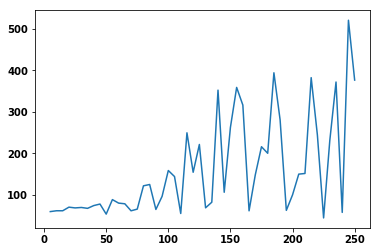

In [28]:
dif_init(1000,X,y)

#### RMS

 Epoch = 3000 eta = 0.1 Loss is 4.995442870566102 k = 5.227796996001742,b = -10.514838157931015


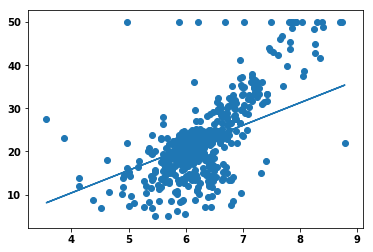

In [29]:
k,b,__= gd_k_b(3000,0.1,1,X,y,loss='RMS')
plt.plot(X,k*X+b)
plt.scatter(X,y)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: 当输入数据与输出是高维相关时，凭经验和观察无法找到拟合关系，这时就需要机器学习来分析数据生成算法模型

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: 该方法每次均随机生成k与b，如果迭代次数过少，则无法收敛到全局最优。

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: 该方法略优于第一种，但是仍有很多次无效迭代在计算loss，也需要较多的迭代次数才能找到全局最优，且性能不稳定。

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:我们的目标是使目标函数在数据集上的loss尽可能趋近于0，而loss的微分(梯度)显示了loss变化量，如果在每次迭代中都能使微分(梯度)<0，经过多次迭代即可实现该目标

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:梯度：是指loss函数每次迭代的变化量  下降：是指loss的梯度为负值

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:每次迭代的都能使loss的梯度为负值，从而使loss减少，因而可以很快地达到全局最优点。

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:机器学习就是给定输入数据与输出，拟合输入与输出，生成目标函数模型（算法）。

# 2. 地铁路径搜索

In [30]:
import matplotlib
print(matplotlib.__path__)

['e:\\anaconda2\\envs\\tf\\lib\\site-packages\\matplotlib']


In [31]:
import math

### 爬取高德地铁数据

In [32]:
import json
import requests
from lxml import etree

In [33]:
def get_citys():
    headers = {"User-Agent": "Mozilla/5.0 (Linux; Android 5.0; SM-G900P Build/LRX21T) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Mobile Safari/537.36"}
    start_url = 'http://map.amap.com/subway/index.html'
    txt = requests.get(start_url, headers).content
    html = etree.HTML(txt)
    areas = html.xpath("//a[contains(@class, 'city')]")
    citys = {}
    for area in areas:
        citys[area.text] = (area.get('id'), area.get('cityname'))
        #print(area.text,area.get('id'),area.get('cityname'))
    return citys    

In [34]:
citys = get_citys()
print(citys)

{'北京': ('1100', 'beijing'), '上海': ('3100', 'shanghai'), '广州': ('4401', 'guangzhou'), '深圳': ('4403', 'shenzhen'), '武汉': ('4201', 'wuhan'), '天津': ('1200', 'tianjin'), '南京': ('3201', 'nanjing'), '香港': ('8100', 'xianggang'), '重庆': ('5000', 'chongqing'), '杭州': ('3301', 'hangzhou'), '沈阳': ('2101', 'shenyang'), '大连': ('2102', 'dalian'), '成都': ('5101', 'chengdu'), '长春': ('2201', 'changchun'), '苏州': ('3205', 'suzhou'), '佛山': ('4406', 'foshan'), '昆明': ('5301', 'kunming'), '西安': ('6101', 'xian'), '郑州': ('4101', 'zhengzhou'), '长沙': ('4301', 'changsha'), '宁波': ('3302', 'ningbo'), '无锡': ('3202', 'wuxi'), '青岛': ('3702', 'qingdao'), '南昌': ('3601', 'nanchang'), '福州': ('3501', 'fuzhou'), '东莞': ('4419', 'dongguan'), '南宁': ('4501', 'nanning'), '合肥': ('3401', 'hefei'), '贵阳': ('5201', 'guiyang'), '厦门': ('3502', 'xiamen'), '哈尔滨': ('2301', 'haerbin'), '石家庄': ('1301', 'shijiazhuang')}


In [35]:
def get_metro(citys,city):
        if citys:
            id_name = citys.get(city)
            return {city : get_metrolist(id_name)}
        else:
            result_dict = {}
            for city_name, id_name in citys.items():
                result_dict[city_name] = get_metrolist(id_name)

            return result_dict

In [36]:
def get_metrolist(id_name):
    headers = {"User-Agent": "Mozilla/5.0 (Linux; Android 5.0; SM-G900P Build/LRX21T) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Mobile Safari/537.36"}
    prefix_url = 'http://map.amap.com/service/subway?srhdata={}_drw_{}.json'
    if id_name == None:
        return
    else:
        id, name = id_name
        url = prefix_url.format(id, name)
        line_dict = {}
        line_nums = {}
        json_dict = json.loads(requests.get(url, headers).text)
        #print(json_dict)    
        metro_lines = json_dict.get("l")    
        for line in metro_lines:
            line_name = line['ln']         #线路名
            line_num = line['ls']          #线路码
            line_nums[line_num] = line_name
        for line in metro_lines:
            station_attr = []
            line_list = []
            line_name = line['ln']         #线路名
            conx = line['c']               #线路图
            station_conx = {}
            if line['st'][0]['p'] != conx[0]:   #站点与图逆序
                conx.reverse()                   #反转图
            conx = [[int(j) for j in i.split(' ')] for i in line['c']]
            for station in line['st']:
                trx = [line_nums[r] for r in station['r'].split('|')]
                rs = [int(i) for i in station['rs'].split('|')[0].split(' ')]
                cord = [float(c) for c in station['sl'].split(",")]
                station_attr.append([station['n'],rs,trx,cord])
            line_dict[line_name] = station_attr
        return line_dict    

### 获取广州地铁数据

In [37]:
line_dict = get_metro(citys,'广州')['广州']
print(line_dict)

{'1号线': [['西塱', [435, 975], ['1号线', '广佛线'], [113.231978, 23.065437]], ['坑口', [435, 939], ['1号线'], [113.232498, 23.078878]], ['花地湾', [434, 905], ['1号线'], [113.23403, 23.087055]], ['芳村', [434, 874], ['1号线'], [113.235703, 23.098592]], ['黄沙', [434, 843], ['1号线', '6号线'], [113.239856, 23.110524]], ['长寿路', [434, 809], ['1号线'], [113.242271, 23.118402]], ['陈家祠', [506, 772], ['1号线'], [113.246439, 23.125727]], ['西门口', [593, 773], ['1号线'], [113.25583, 23.125219]], ['公园前', [680, 773], ['1号线', '2号线'], [113.264315, 23.125446]], ['农讲所', [740, 773], ['1号线'], [113.275602, 23.126623]], ['烈士陵园', [803, 773], ['1号线'], [113.285663, 23.126704]], ['东山口', [861, 773], ['1号线', '6号线'], [113.295373, 23.12398]], ['杨箕', [937, 774], ['1号线', '5号线'], [113.308877, 23.128137]], ['体育西路', [1001, 774], ['1号线', '3号线', '3号线(北延段)'], [113.321503, 23.131138]], ['体育中心', [1091, 713], ['1号线'], [113.328376, 23.13497]], ['广州东站', [1001, 662], ['1号线', '3号线(北延段)'], [113.324851, 23.150968]]], '2号线': [['广州南站', [652, 1275], ['2号线', '7号线'], 

In [38]:
line_dict['3号线(北延段)']

[['机场北(2号航站楼)', [905, 170], ['3号线(北延段)'], [113.305659, 23.396197]],
 ['机场南(1号航站楼)', [905, 205], ['3号线(北延段)'], [113.303048, 23.386627]],
 ['高增', [905, 269], ['3号线(北延段)', '9号线'], [113.295504, 23.355162]],
 ['人和', [905, 319], ['3号线(北延段)'], [113.295995, 23.335224]],
 ['龙归', [905, 369], ['3号线(北延段)'], [113.300834, 23.288736]],
 ['嘉禾望岗', [905, 416], ['2号线', '3号线(北延段)', '14号线'], [113.289243, 23.23746]],
 ['白云大道北', [920, 452], ['3号线(北延段)'], [113.298178, 23.222382]],
 ['永泰', [949, 475], ['3号线(北延段)'], [113.306295, 23.220226]],
 ['同和', [978, 497], ['3号线(北延段)'], [113.326264, 23.19706]],
 ['京溪南方医院', [1001, 532], ['3号线(北延段)'], [113.326126, 23.185225]],
 ['梅花园', [1001, 568], ['3号线(北延段)'], [113.320507, 23.175211]],
 ['燕塘', [1001, 606], ['3号线(北延段)', '6号线'], [113.327132, 23.15998]],
 ['广州东站', [1001, 662], ['1号线', '3号线(北延段)'], [113.324851, 23.150968]],
 ['林和西', [1001, 706], ['3号线(北延段)', 'APM线'], [113.323947, 23.141525]],
 ['体育西路', [1001, 774], ['1号线', '3号线', '3号线(北延段)'], [113.321503, 23.131138]]]

In [39]:
from collections import defaultdict

In [40]:
conx1_rs = defaultdict(list)
conx1_rs = {}
conx1_pos = {}
connx1 = [i[0] for i in line_dict['1号线']]
rs1 = [i[1] for i in line_dict['1号线']]
conx1_rs['1号线'] = connx1
for ln,rs in zip(connx1,rs1):
    conx1_pos[ln] = rs
print(conx1_rs)
print(conx1_pos)

{'1号线': ['西塱', '坑口', '花地湾', '芳村', '黄沙', '长寿路', '陈家祠', '西门口', '公园前', '农讲所', '烈士陵园', '东山口', '杨箕', '体育西路', '体育中心', '广州东站']}
{'西塱': [435, 975], '坑口': [435, 939], '花地湾': [434, 905], '芳村': [434, 874], '黄沙': [434, 843], '长寿路': [434, 809], '陈家祠': [506, 772], '西门口': [593, 773], '公园前': [680, 773], '农讲所': [740, 773], '烈士陵园': [803, 773], '东山口': [861, 773], '杨箕': [937, 774], '体育西路': [1001, 774], '体育中心': [1091, 713], '广州东站': [1001, 662]}


In [41]:
import networkx as nx
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family']='sans-serif'

In [42]:
conx1_graph = nx.Graph()

In [43]:
nx.draw?

In [44]:
nx.Graph?

In [45]:
conx1_graph.add_nodes_from(connx1)

In [46]:
conx1_graph.add_path(connx1)

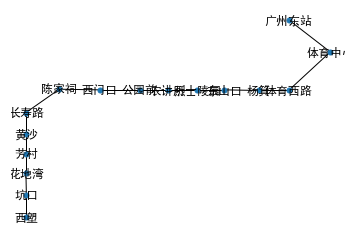

In [47]:
nx.draw(conx1_graph,conx1_pos,ax = plt.gca().invert_yaxis(),with_labels=True, node_size=25)

In [64]:
def gen_graph(line_dict):
    path_graph = {}
    laos = {}
    cords = {}
    trxs = {}
    for lx,ls in line_dict.items():
        for st in ls:                    #站点属性
            path = []            
            for l in st[2]:              #线路
                for s in line_dict[l]:                    
                    
                    if s[0] == st[0]:    #
                        
                        idx = line_dict[l].index(s)                        
                        if idx == 0:
                            path.append(line_dict[l][idx+1][0])
                        elif idx == len(line_dict[l])-1:
                            path.append(line_dict[l][idx-1][0])
                        else:
                            path.append(line_dict[l][idx+1][0])
                            path.append(line_dict[l][idx-1][0])
                        #print(len(line_dict[l]),idx,s[0],path)
            path_graph[st[0]] = path               
            laos[st[0]] = st[3] 
            cords[st[0]] = st[1]
            trxs[st[0]] = st[2]
    return path_graph,laos,cords,trxs

In [65]:
path_conx = nx.Graph(path_graph)

### 站点属性集合

#### path_graph: 连接关系图
#### laos: 站点经纬度
#### cords：站点坐标
#### trxs: 经过线路

In [66]:
path_graph,laos,cords,trxs = gen_graph(line_dict)

In [87]:
path_graph['昌岗']

['江南西', '江泰路', '晓港', '宝岗大道']

In [88]:
laos['体育西路']

[113.321503, 23.131138]

In [89]:
cords['体育西路']

[1001, 774]

In [60]:
trxs['体育西路']

['1号线', '3号线', '3号线(北延段)']

In [69]:
def get_geo_distance(station1, station2):
    return geo_distance(laos[station1], laos[station2])

In [70]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1  = origin
    lon2, lat2  = destination
    #print(origin,lon1,lat1)
    
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

### 最短路程

In [71]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distance(path):
        distance = 0
        #print('当前计算path：',path)
        for i in range(len(path[:-1])):
            
            distance += get_geo_distance(path[i], path[i+1])
            #print('站点：',path[i], path[i+1],'距离：',get_geo_distance(path[i], path[i+1]))
        #print('当前计算path：',path,'距离：',distance)
        return distance

    return sorted(pathes, key=get_path_distance)[0]

### 最少站数

In [72]:
def min_station_first(pathes):
    return sorted(pathes, key=len)[0]

### 最少换乘

In [111]:
def min_transfer_first(pathes):
    trx = []
    def get_path_trx(path):
        trx = 0
        #print('当前计算path：',path)
        trx_set = set()
        l1 = 0
        l2 = 0
        for i in range(len(path[:-1])):
            x = list(set(trxs[path[i]])&set(trxs[path[i+1]]))[0]
            #print(path[i]+'→'+path[i+1]+' 线路：',trxs[path[i]],trxs[path[i+1]],'交集：',x)
            trx_set.add(x)
            l1 = len(trx_set)
            if l1!=l2 :
                l2 = l1
                if i == 0:
                    path[i] = '<'+x+'>'+path[i]
                else :
                    path[i]+='<换乘'+x+'>'
            #else: path[i+1]+='('+x+')'
        #print('当前计算path：',path)
        #print('当前path路线集：',trx_set)
        #print('换乘次数：',len(trx_set)-1)
        return len(trx_set)-1

    return sorted(pathes, key=get_path_trx)[0]        

In [74]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    #visitied = set()
    visits = [[]]
    results = []
    i = 0
    while pathes: # if we find existing pathes
        #print('起路径簇：',pathes)
        path = pathes.pop(0)
        visit = visits.pop(0)
        #print('起子路径：',path)
        #print('起前路径：',visit)
        froninter = path[-1]
        #print('当前扩展节点：', froninter)
        #print('已访问节点集：',visitied)
        #if froninter in visitied: 
        #    print('当前已访问节点：',froninter)
        #    continue
        if froninter in visit: 
            #print('当前已访问节点：',froninter)
            continue
        #print('新节点：',froninter)    
        successors = connection_grpah[froninter]
        #print('接下来扩展节点：',successors)
        for city in successors:
            if city in path: continue  # eliminate loop
            #print('扩展：',city)    
            new_path = path + [city]
            #print('路径更新为：',new_path)
            #new_visit = path
            visits.append(path)
            pathes.append(new_path)
            #print('路径簇：',pathes)
            if city == destination: 
                #print('到达终点：',destination)
                #print(new_path)
                results.append(new_path)
                #print('路径：'+str(i),new_path)
                i+=1
                #print('Total pathes:',len(results))
                #pathes.append(new_path)
                #print('Now pathes:',pathes)
                #return new_path
        
        #visitied.add(froninter)     
        #pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制
        #print('Got：',pathes)
        #print(pathes)
    print('Total pathes:',len(results))
    return sort_candidate(results)
    
    

In [75]:
shortest_path_first([['西塱', '坑口', '花地湾', '芳村', '黄沙'],['西塱', '鹤洞', '沙涌', '沙园', '宝岗大道','昌岗','江南西','市二宫','海珠广场','一德路','文化公园','黄沙']])

['西塱', '坑口', '花地湾', '芳村', '黄沙']

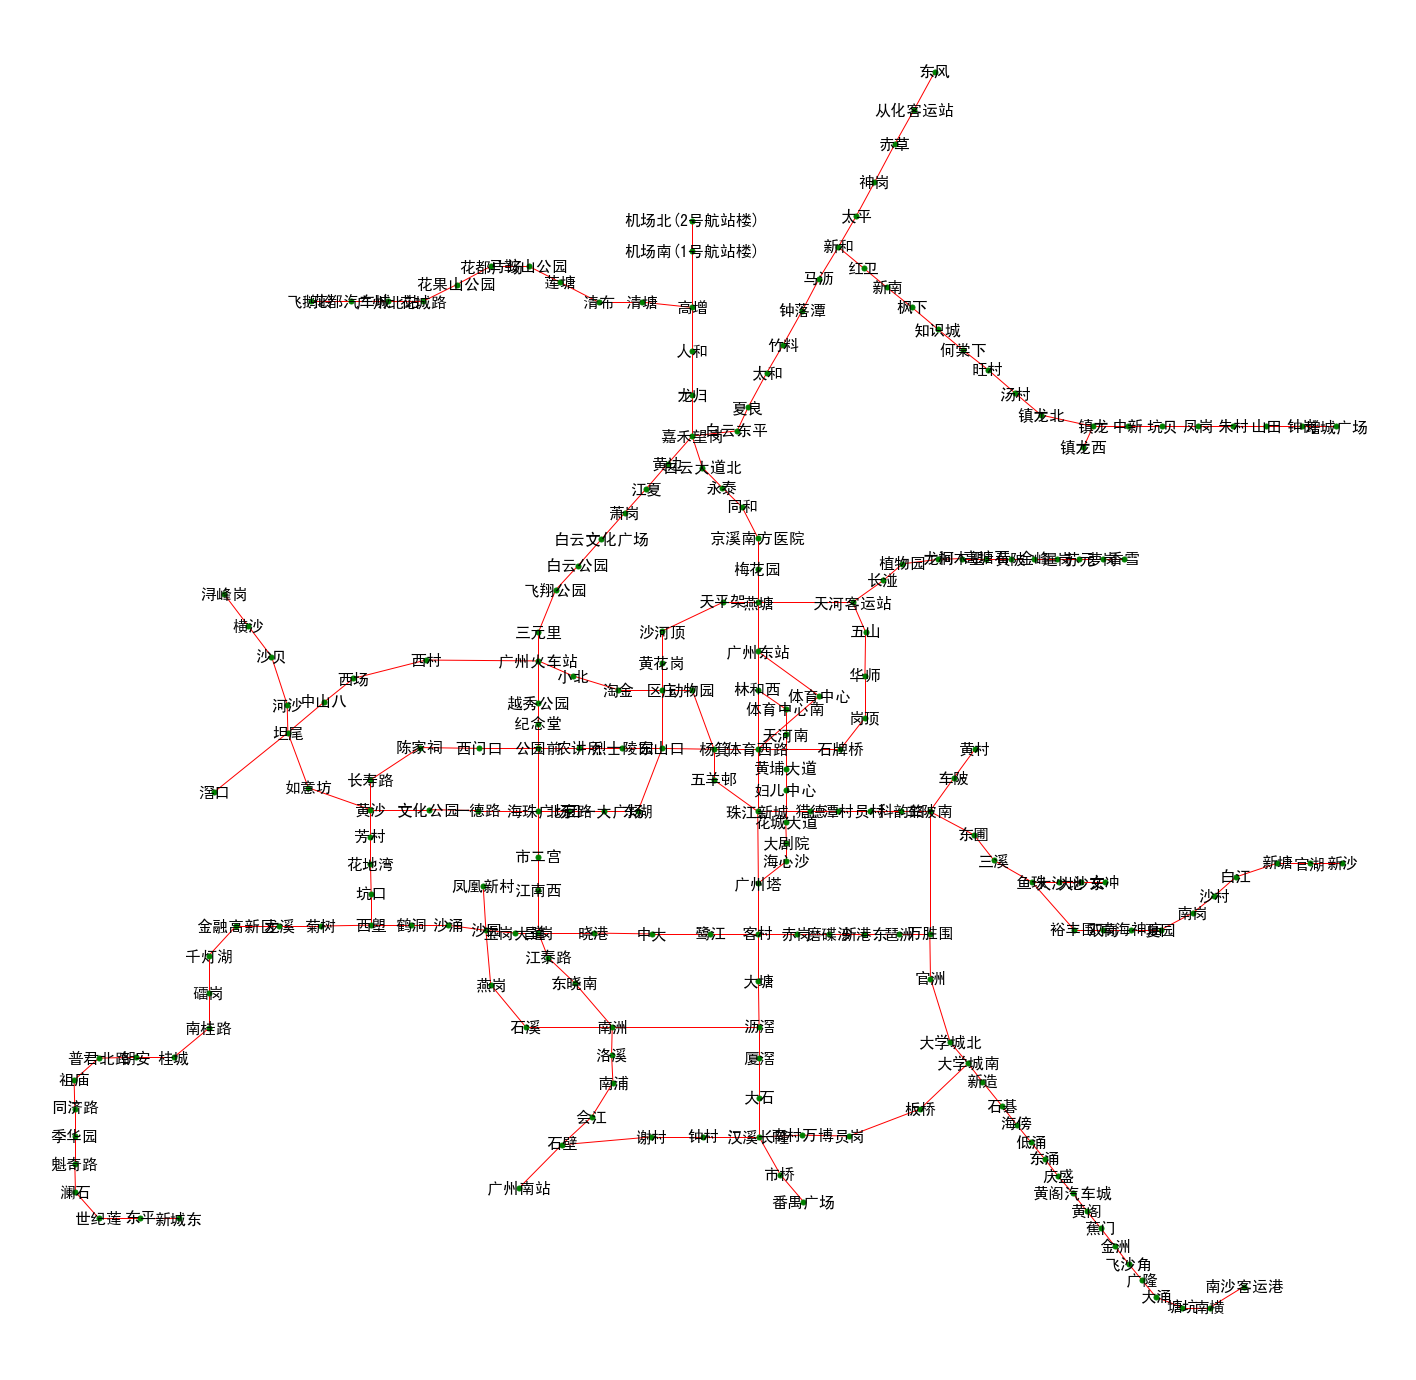

In [76]:
plt.figure(figsize=(25, 25))
nx.draw(path_conx,cords,ax = plt.gca().invert_yaxis(),node_color = 'g',edge_color = 'r',with_labels = True,font_size = 16,node_size =25)

In [63]:
shortest_path = search('西塱','江夏',path_graph,shortest_path_first)
print(shortest_path)

Total pathes: 15119
['西塱', '坑口', '花地湾', '芳村', '黄沙', '长寿路', '陈家祠', '西门口', '公园前', '纪念堂', '越秀公园', '广州火车站', '三元里', '飞翔公园', '白云公园', '白云文化广场', '萧岗', '江夏']


#### 最短距离：西塱→江夏

In [83]:
pretty_sign = emoji.emojize(':metro:→')
pretty_sign.join(shortest_path)

距离最短：


'西塱🚇→坑口🚇→花地湾🚇→芳村🚇→黄沙🚇→长寿路🚇→陈家祠🚇→西门口🚇→公园前🚇→纪念堂🚇→越秀公园🚇→广州火车站🚇→三元里🚇→飞翔公园🚇→白云公园🚇→白云文化广场🚇→萧岗🚇→江夏'

#### 最小站数：西塱→江夏

In [81]:
pretty_sign.join(search('西塱','江夏',path_graph,min_station_first))

Total pathes: 15119


'西塱🚇→坑口🚇→花地湾🚇→芳村🚇→黄沙🚇→如意坊🚇→坦尾🚇→中山八🚇→西场🚇→西村🚇→广州火车站🚇→三元里🚇→飞翔公园🚇→白云公园🚇→白云文化广场🚇→萧岗🚇→江夏'

#### 最小换乘: 西塱→江夏

In [112]:
pretty_sign.join(search('西塱','江夏',path_graph,min_transfer_first))

Total pathes: 15119


'<1号线>西塱🚇→坑口🚇→花地湾🚇→芳村🚇→黄沙🚇→长寿路🚇→陈家祠🚇→西门口🚇→公园前<换乘2号线>🚇→纪念堂🚇→越秀公园🚇→广州火车站🚇→三元里🚇→飞翔公园🚇→白云公园🚇→白云文化广场🚇→萧岗🚇→江夏'

In [110]:
min_transfer_first([['西塱', '坑口', '花地湾', '芳村', '黄沙'],['西塱', '鹤洞', '沙涌', '沙园', '宝岗大道','昌岗','江南西','市二宫','海珠广场','一德路','文化公园','黄沙']])

当前计算path： ['西塱', '坑口', '花地湾', '芳村', '黄沙']
西塱→坑口 线路： ['1号线', '广佛线'] ['1号线'] 交集： 1号线
坑口→花地湾 线路： ['1号线'] ['1号线'] 交集： 1号线
花地湾→芳村 线路： ['1号线'] ['1号线'] 交集： 1号线
芳村→黄沙 线路： ['1号线'] ['1号线', '6号线'] 交集： 1号线
当前计算path： ['<1号线>西塱', '坑口', '花地湾', '芳村', '黄沙']
当前path路线集： {'1号线'}
换乘次数： 0
当前计算path： ['西塱', '鹤洞', '沙涌', '沙园', '宝岗大道', '昌岗', '江南西', '市二宫', '海珠广场', '一德路', '文化公园', '黄沙']
西塱→鹤洞 线路： ['1号线', '广佛线'] ['广佛线'] 交集： 广佛线
鹤洞→沙涌 线路： ['广佛线'] ['广佛线'] 交集： 广佛线
沙涌→沙园 线路： ['广佛线'] ['8号线', '广佛线'] 交集： 广佛线
沙园→宝岗大道 线路： ['8号线', '广佛线'] ['8号线'] 交集： 8号线
宝岗大道→昌岗 线路： ['8号线'] ['2号线', '8号线'] 交集： 8号线
昌岗→江南西 线路： ['2号线', '8号线'] ['2号线'] 交集： 2号线
江南西→市二宫 线路： ['2号线'] ['2号线'] 交集： 2号线
市二宫→海珠广场 线路： ['2号线'] ['2号线', '6号线'] 交集： 2号线
海珠广场→一德路 线路： ['2号线', '6号线'] ['6号线'] 交集： 6号线
一德路→文化公园 线路： ['6号线'] ['6号线'] 交集： 6号线
文化公园→黄沙 线路： ['6号线'] ['1号线', '6号线'] 交集： 6号线
当前计算path： ['<广佛线>西塱', '鹤洞', '沙涌', '沙园<换乘8号线>', '宝岗大道', '昌岗<换乘2号线>', '江南西', '市二宫', '海珠广场<换乘6号线>', '一德路', '文化公园', '黄沙']
当前path路线集： {'广佛线', '2号线', '8号线', '6号线'}
换乘次数： 3


['<1号线>西塱', '坑口', '花地湾', '芳村', '黄沙']

In [113]:
import emoji

In [114]:
print(emoji.emojize('Python is :metro:'))

Python is 🚇
